In [231]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt

In [57]:
path = r"C:\Users\f08132d\Downloads\Coding test\\"
outPath = r"C:\Users\f08132d\Downloads\Coding test\output\\"

# Parte 1

In [130]:
df = pd.read_csv(path + "bike_v0.csv")
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [41]:
# punto 2
print("valore medio della colonna selling_price: " , df.selling_price.mean())
print("valore massimo della colonna km_driven: " , df.km_driven.max())

valore medio della colonna selling_price:  59638.151743638075
valore massimo della colonna km_driven:  880000


In [46]:
# punto 3
print("quantità di valori nulli della colonna ex_showroom_price: " , df.ex_showroom_price.isna().sum() )

quantità di valori nulli della colonna ex_showroom_price:  435


In [99]:
# punto 4: Aggiungere il campo “selling_price_euro” (cambio 1€ = 84.04 Rupie)
df["selling_price_euro"] = df["selling_price"] / 83.04
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,selling_price_euro,brand
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,2107.418112,Royal
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,541.907514,Honda
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,1806.358382,Royal
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,782.755299,Yamaha
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,240.847784,Yamaha


In [58]:
# punto 5: Generare il file csv “bike_v0_2011.csv”
bike = df[(df.year==2014) | (df.year==2015)].reset_index(drop=True)
bike.to_csv(outPath + "bike_v0_2011.csv" , index=False)

In [69]:
# punto 6: Indicare il numero di auto in vendita per ciascun valore del campo owner
df.groupby("owner").size()

owner
1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
dtype: int64

In [98]:
# punto 7: Aggiungere il campo “brand”, derivato dal campo name in cui si indica unicamente il produttore della moto
df["brand"] = df.name.str.extract("(\w*)")
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,selling_price_euro,brand
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,2107.418112,Royal
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,541.907514,Honda
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,1806.358382,Royal
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,782.755299,Yamaha
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,240.847784,Yamaha


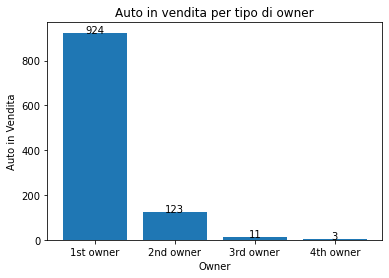

In [225]:
# punto 8: Creare un barplot della richiesta al punto 6
plot = df.groupby("owner").size()

plt.bar(plot.index, plot)

plt.title("Auto in vendita per tipo di owner")
plt.xlabel("Owner")
plt.ylabel("Auto in Vendita")

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
addlabels(plot.index, plot)

        
plt.show()

###  PARTE 1a (opzionale)

In [175]:
# 1. Apertura del file “bike_v1.csv”
df1 = pd.read_csv(path + "bike_v1.csv")
df1.head()
print(r"""Possibili anomalie: 
      1) è presente una stringa 'ottanta' nella colonna  'selling_price' (trovata cercando di convertire in float).
      2) 40 moto usate hanno un prezzo di vendita superiore al costo di acquisto.
      3) per alcune moto la colonna 'year' non è coerente con l'intervallo di produzione riportato nella colonna 'name'.
      4) il prezzo dello showroom dovrebbe essere presente solo per i venditori di prima mano (1st owner), ma a volte è riportato anche per gli altri. """)

Possibili anomalie: 
      1) è presente una stringa 'ottanta' nella colonna  'selling_price' (trovata cercando di convertire in float).
      2) 40 moto usate hanno un prezzo di vendita superiore al costo di acquisto.
      3) per alcune moto la colonna 'year' non è coerente con l'intervallo di produzione riportato nella colonna 'name'.
      4) il prezzo dello showroom dovrebbe essere presente solo per i venditori di prima mano (1st owner), ma a volte è riportato anche per gli altri. 


In [229]:
for riga in range(len(df1)):
    try:
        float(df1.loc[riga ,"selling_price"])
    except:
        print(riga, df1.loc[riga ,"selling_price"])

664 ottanta


### PARTE 1b (opzionale)

In [177]:
# Apertura del file “bike_v2.csv”
df2 = pd.read_csv(path + "bike_v2.csv")
df2.head()
print(""" Anomalie:
       1) la stringa 'Individual' è presente per quattro volte nella colonna 'year'. trovata cercando di convertire in float.
       """)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350.0,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650.0,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000.0,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000.0,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000.0,NaN


In [ ]:
for riga in range(len(df2)):
    try:
        float(df2.loc[riga ,"year"])
    except:
        print(riga, df2.loc[riga ,"year"])

### PARTE 1c (opzionale)

In [226]:
print(""" 
Imposterei il problema effettuando delle prove attraverso diversi modelli di previsione con complessità crescente. Partirei da un modello di regressione lineare multipla,
per poi effettuare delle prove con modelli del tipo k-means ed alberi decisionali (e foreste), andando a comparare la performance di ognuno di essi (su una partizione di test) per poi scegliere
un modello finale che utilizzerei per la stima vera e propria.
""")

 
Imposterei il problema effettuando delle prove attraverso diversi modelli di previsione con complessità crescente. Partirei da un modello di regressione lineare multipla,
per poi effettuare delle prove con modelli del tipo k-means ed alberi decisionali (e foreste), andando a comparare la performance di ognuno di essi (su una partizione di test) per poi scegliere
un modello finale che utilizzerei per la stima vera e propria.

